In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [28]:
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

In [29]:
'''
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df = pd.read_csv(path,names=headers)
'''

'\nheaders = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",\n         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",\n         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",\n         "peak-rpm","city-mpg","highway-mpg","price"]\ndf = pd.read_csv(path,names=headers)\n'

In [30]:
df = pd.read_csv(path,header=None)
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers

In [31]:
#df.head()
#df.info()
#df.info

Dealing with the blank cells / NaN / missing values

In [32]:
#newdf = df.dropna(subset = ['price'], axis = 0, inplace=False)
df.dropna(subset = ['price'],axis = 0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

df.replace("?", np.nan, inplace = True)

In [33]:
#df.to_csv('carPrice.csv',index = False)

In [34]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [ ]:
#df.describe()
df.describe(include='all')
#df.describe(include=['object'])

In [ ]:
#df[['length','compression-ratio']].describe()

1. Missing values in continuous variables

In [5]:
mean = df['normalized-losses'].astype('float').mean(axis=0)
df["normalized-losses"].replace(np.nan, mean, inplace=True)

avg_bore=df['bore'].astype('float').mean(axis=0)
df["bore"].replace(np.nan, avg_bore, inplace=True)

df['stroke'].replace(np.nan,df['stroke'].astype('float').mean(axis=0), inplace=True)

avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

2. Missing values in categorical variables

In [6]:
df['num-of-doors'].value_counts() # this is series
df['num-of-doors'].value_counts().to_frame() #series to df
df['num-of-doors'].value_counts().idxmax()
#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace=True)

In [7]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts

,value_counts
engine-location,
front,202
rear,3


Now, checking datatypes for all variables and changing if needed : For data analysis purpose, its good to have numerical values

In [8]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

df["horsepower"]=df["horsepower"].astype(int, copy=True)

For categorical variables, visualizing data with groupby / pivot table / heatmap method

In [9]:
df['drive-wheels'].unique() #returns array
# grouping results
df_group_one = df[['drive-wheels','body-style','price']]
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one.head(10)

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


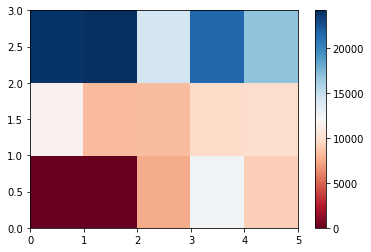

In [10]:
#creating pivot table
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0

#heatmap
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

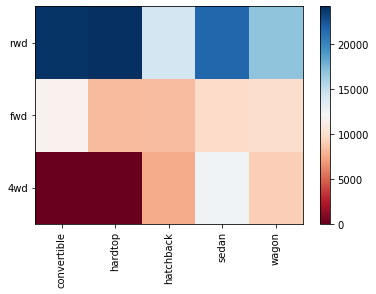

In [11]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

Normalizing data and/or modifying variables according to the context

In [ ]:
'''
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-mpg'] = 235/df["city-mpg"]
df.rename(columns={'city-mpg':'city-L/100km'}, inplace=True)

df['highway-mpg']= 235/df['highway-mpg']
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)
'''

Binning

Text(0.5, 1.0, 'horsepower bins')

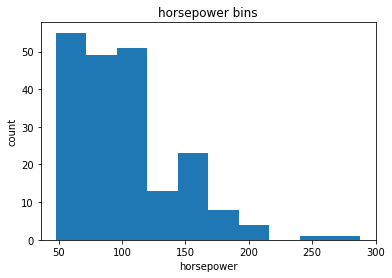

In [12]:
plt.hist(df["horsepower"])

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")


Text(0.5, 1.0, 'horsepower bins')

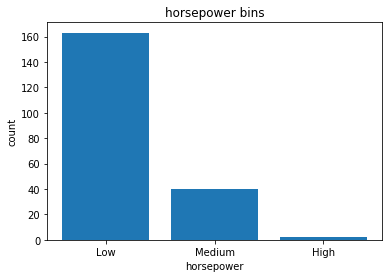

In [13]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
group_names = ['Low', 'Medium', 'High']
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df["horsepower-binned"].value_counts()

plt.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

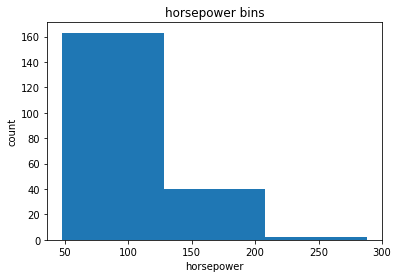

In [14]:
a = (0,1,2)

# draw historgram of attribute "horsepower" with bins = 3
plt.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

One hot encoding in case of categorical variables

In [15]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"]) #creates new dataframe

dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


In [16]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [17]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'horsepower-binned', 'fuel-type-diesel', 'fuel-type-gas'],
      dtype='object')

In [18]:
# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['aspiration'])

# change column names for clarity
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

#merge the new dataframe to the original datafram
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "aspiration" from "df"
df.drop('aspiration', axis = 1, inplace=True)

In [19]:
df.to_csv('carPrice.csv',index = False)

Model development

In [20]:
df.head()
print(df.columns)
df['engine-size'].describe()

Index(['symboling', 'normalized-losses', 'make', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'horsepower-binned', 'fuel-type-diesel', 'fuel-type-gas',
       'aspiration-std', 'aspiration-turbo'],
      dtype='object')


count    205.000000
mean     126.907317
std       41.642693
min       61.000000
25%       97.000000
50%      120.000000
75%      141.000000
max      326.000000
Name: engine-size, dtype: float64

In [21]:
from sklearn.linear_model import LinearRegression

In [23]:
lm = LinearRegression () #creating object instance
X=df[['highway-mpg']]
Y=df['price']
lm.fit(X,Y)  #fitting the model
Yhat = lm.predict(X)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [24]:
lm.intercept_
lm.coef_
lm.score(X,Y)

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

In [25]:
df = df._get_numeric_data()

In [26]:
df

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000.0,21,27,13495.0,0,1,1,0
1,3,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000.0,21,27,16500.0,0,1,1,0
2,1,122,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000.0,19,26,16500.0,0,1,1,0
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500.0,24,30,13950.0,0,1,1,0
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500.0,18,22,17450.0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400.0,23,28,16845.0,0,1,1,0
201,-1,95,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300.0,19,25,19045.0,0,1,0,1
202,-1,95,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500.0,18,23,21485.0,0,1,1,0
203,-1,95,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800.0,26,27,22470.0,1,0,0,1
